In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

### Basic Understanding of Data

In [275]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [242]:
df['is_canceled'].value_counts(normalize=True)
#Data set is slighlty imbalanced

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

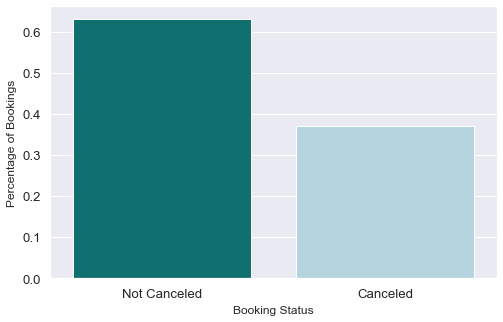

In [243]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [244]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


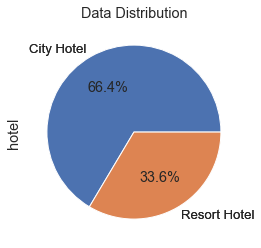

In [245]:
counts = df['hotel'].value_counts()

# Create a pie chart
counts.plot.pie()
counts.plot.pie(autopct='%1.1f%%')

# Add a title
plt.title('Data Distribution')

# Show the plot
plt.show()

## Dataset Cleaning, Preparation and outliers Handling

### Missing Data


In [246]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

children contains 4 rows with missing values
country contains 488 rows with missing values

NULL values for agent and company must be changed to No agent and No Company 

In [247]:
# get columns with missing values
cols_with_missing = df.columns[df.isna().any()].tolist()

# get percentage of missing values for each column
missing_percentage = df[cols_with_missing].isna().mean() * 100

# create a DataFrame with columns and missing value percentages
missing_data = pd.DataFrame({
    'missing_percentage %': missing_percentage
})

# display the result
print(missing_data)

          missing_percentage %
children              0.003350
country               0.408744
agent                13.686238
company              94.306893


In [248]:
# Changing agent value of "NULL" to "No Agent":
df['agent'].fillna("No Agent", inplace=True)

In [249]:
# Changing company value of "NULL" to "No Company":
df['company'].fillna("No Company", inplace=True)

In [250]:
# Drop the 4 observations with missing children values.
df.dropna(subset=['children'], inplace=True)


In [251]:
# Changing country value of "NULL" to "Unknown":
df['country'].fillna("Unknown", inplace=True)

In [252]:
missing_percentage = df[cols_with_missing].isna().mean() * 100

# create a DataFrame with columns and missing value percentages
missing_data = pd.DataFrame({
    'missing_percentage %': missing_percentage
})

# display the result
print(missing_data)

          missing_percentage %
children                   0.0
country                    0.0
agent                      0.0
company                    0.0


### Data Types

In [253]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The children feature must be type of integer
The reservation status date feature should be of datetime type.

In [254]:
# Changing children to integer type: 
df['children'] = df['children'].astype(int)

# Changing reservation status date to datetime type: 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Check for Duplicates

In [255]:
# Checking for duplicates: 
df[df.duplicated(keep='first')]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,No Company,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,No Company,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,No Company,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,No Company,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,No Company,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


It indicates that the dataset contains 31994 duplicates but we cannot be sure whether they are truly duplicates because there aren't any booking ID. So we won't remove  them.




### Outlier Removal

In [256]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Print the selected columns
num_col_names = num_cols.columns.tolist()

# Print the column names
print(num_col_names)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


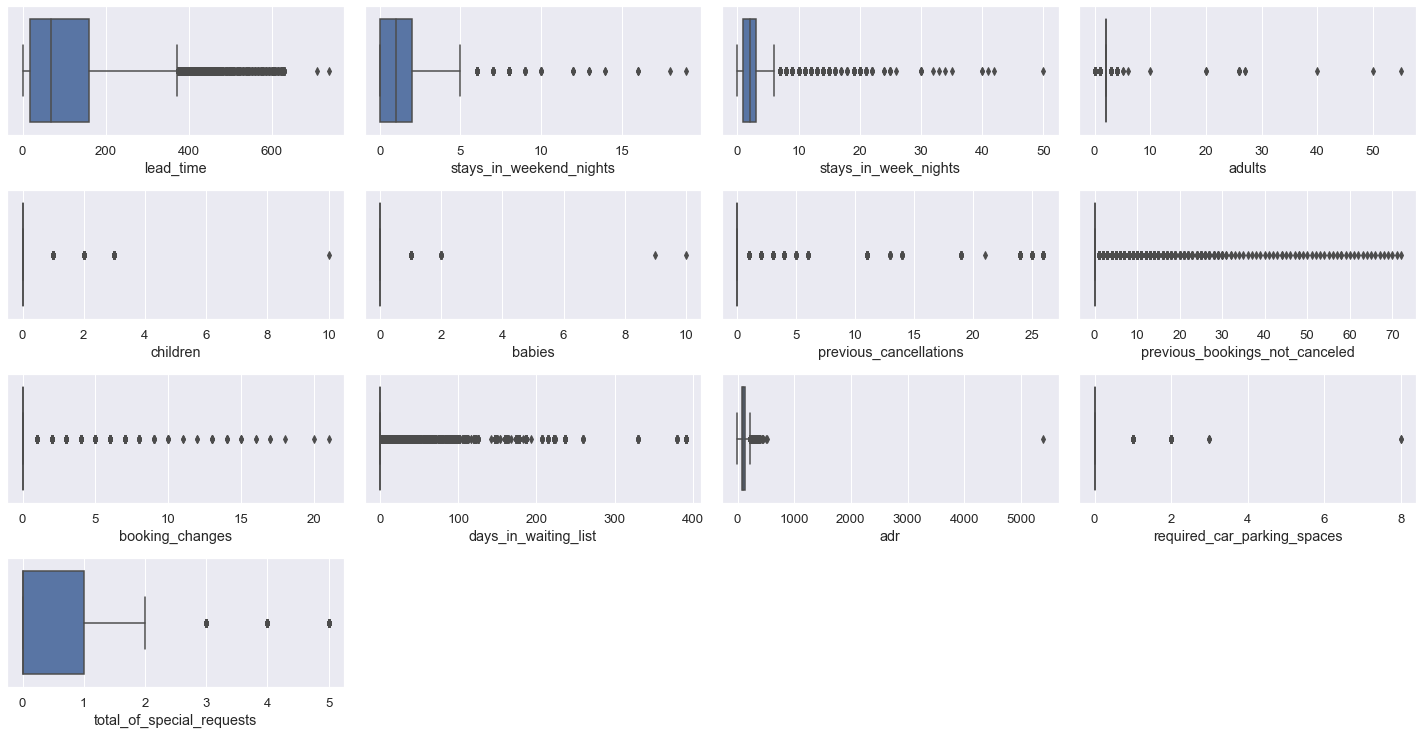

In [257]:
#Now check for outliers
#agent and company columns contains the ID ,
numerical_col=[ 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
plt.figure(figsize = (20, 15))
x = 1 

for column in numerical_col:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

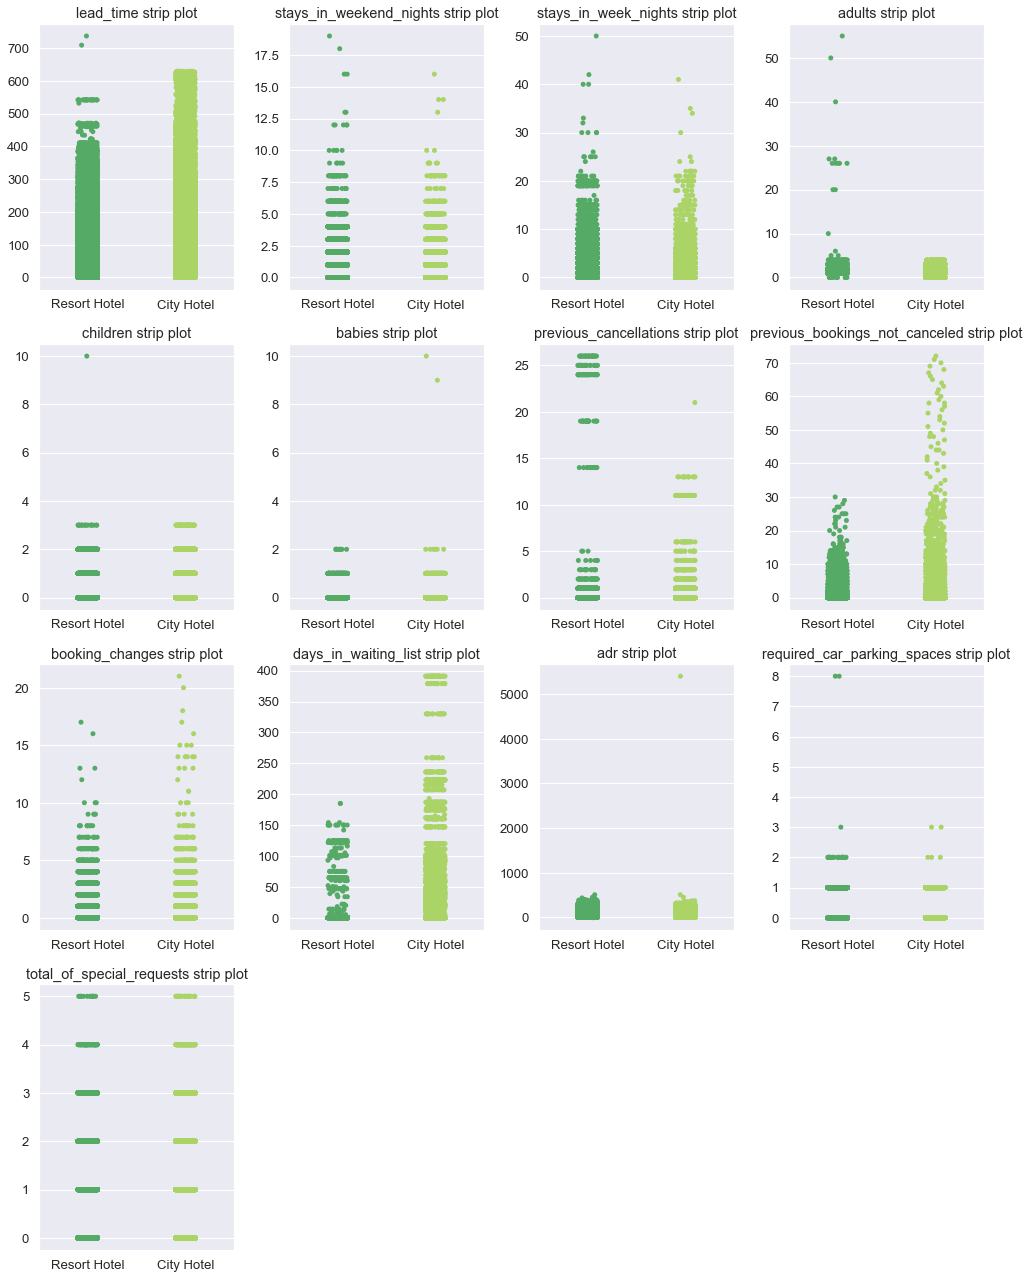

In [258]:
#Creating a stripplot to visualize differences in data distribution between hotels

numerical_col=[ 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in numerical_col:
    plt.subplot(4,4,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()

#### Adult Abnormal Value

In [259]:
# since it's impossible to have 0 adults to book a hotel room 
df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)

#### ADR Abnormal Value
There's an adr(average daily rate) that's negative and it is impossible to have a negative adr
Max value for adr is also absurdly high

In [260]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
df = df.drop(df[df.adr < 0].index)


In [261]:
df = df.drop(df[df.adr > 5000].index)


#### Converted coloumns with unusual values into categorical 


Example: In previous cancellations column  0 means that the client did not cancel or enjoy a reservation at the hotel prior to the current reservation and 1 means that it did occur, at least once.

In [262]:
df.loc[df['days_in_waiting_list']           > 0, ['days_in_waiting_list']          ] = 1
df.loc[df['previous_cancellations']         > 0, ['previous_cancellations']        ] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1

### Feature Engineering

<!-- The original dataset provides a custumer's arrival date with day, month, and year each in a separate feature. For analysis purposes, it is easier to have all of those elements combined into one arrival_date_full feature. -->

In [263]:
#getting the total stays column by adding the weekday stays and the weekend stays
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [264]:
df[['total_stays', 'stays_in_weekend_nights', 'stays_in_week_nights']].sample(n=5)

,total_stays,stays_in_weekend_nights,stays_in_week_nights
21916,1,0,1
82396,3,0,3
61930,7,2,5
6375,5,1,4
40921,1,1,0


In [265]:
# total guest of the hotel booking by adding the adults, children and babies
df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [266]:
df[['guests', 'adults', 'children','babies']].sample(n=5)

,guests,adults,children,babies
1511,4,2,2,0
48064,2,2,0,0
94216,1,1,0,0
46588,2,2,0,0
38090,2,2,0,0


In [267]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0


In [268]:
df[['kids', 'children','babies']].sample(n=5)

,kids,children,babies
89208,0,0,0
76144,0,0,0
104597,0,0,0
113045,0,0,0
56593,0,0,0


In [276]:
df['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [282]:
df.sample(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
17427,Resort Hotel,0,532,2015,October,40,2,2,7,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,47.46,0,0,Check-Out,2015-10-11
80463,City Hotel,1,34,2015,December,50,8,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19.0,NaN,0,Transient,90.00,0,0,Canceled,2015-11-17
98350,City Hotel,0,4,2016,September,40,27,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,NaN,0,Transient,166.25,0,0,Check-Out,2016-09-28
37654,Resort Hotel,0,97,2017,June,25,19,1,5,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,120.00,0,1,Check-Out,2017-06-25
39548,Resort Hotel,0,3,2017,August,34,20,1,0,1,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,127.0,NaN,0,Transient,143.20,0,0,Check-Out,2017-08-21
36902,Resort Hotel,0,138,2017,May,22,28,2,2,2,0.0,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,410.0,NaN,0,Transient,56.70,0,1,Check-Out,2017-06-01
4577,Resort Hotel,0,162,2016,March,13,24,0,3,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,84.00,0,0,Check-Out,2016-03-27
109713,City Hotel,0,105,2017,April,15,13,0,3,2,0.0,0,SC,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,2017-04-16
85233,City Hotel,0,16,2016,March,11,8,0,3,1,0.0,0,BB,FRA,Corporate,TA/TO,0,0,0,D,D,0,No Deposit,NaN,209.0,0,Transient-Party,76.00,0,0,Check-Out,2016-03-11
57536,City Hotel,1,250,2016,September,40,26,1,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,3.0,NaN,0,Transient,95.00,0,0,Canceled,2016-06-28


In [270]:
#Replace Undefined with SC- self catering
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

### Dropping Redundant columns

In [271]:
df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'adults','children'], axis=1)


In [272]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Agent,No Company,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Agent,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No Company,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No Company,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,0


In [273]:
df.to_csv('hotel_cleaned_data_set1.csv' ,index= False)
